   Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8 

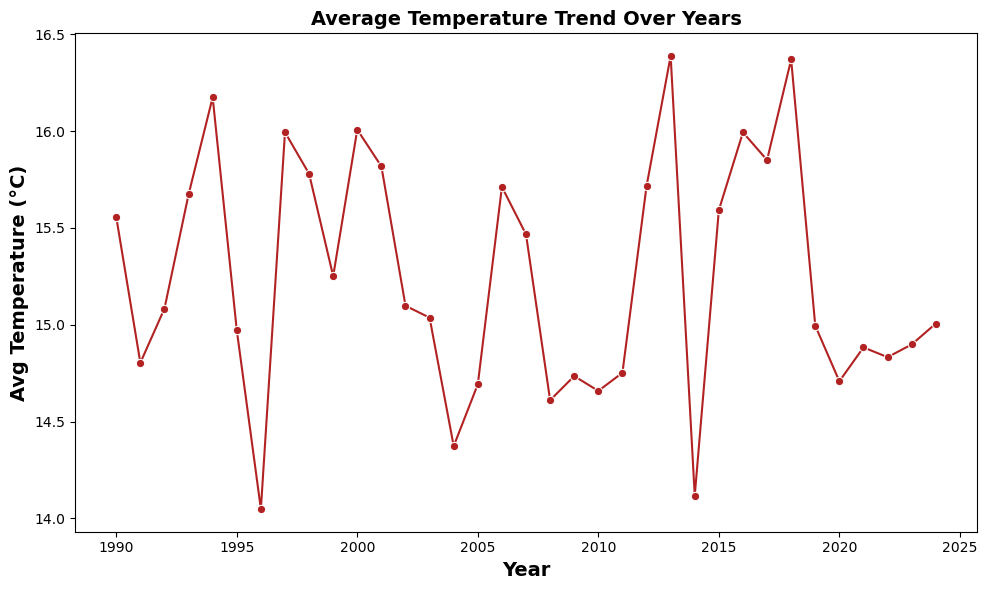

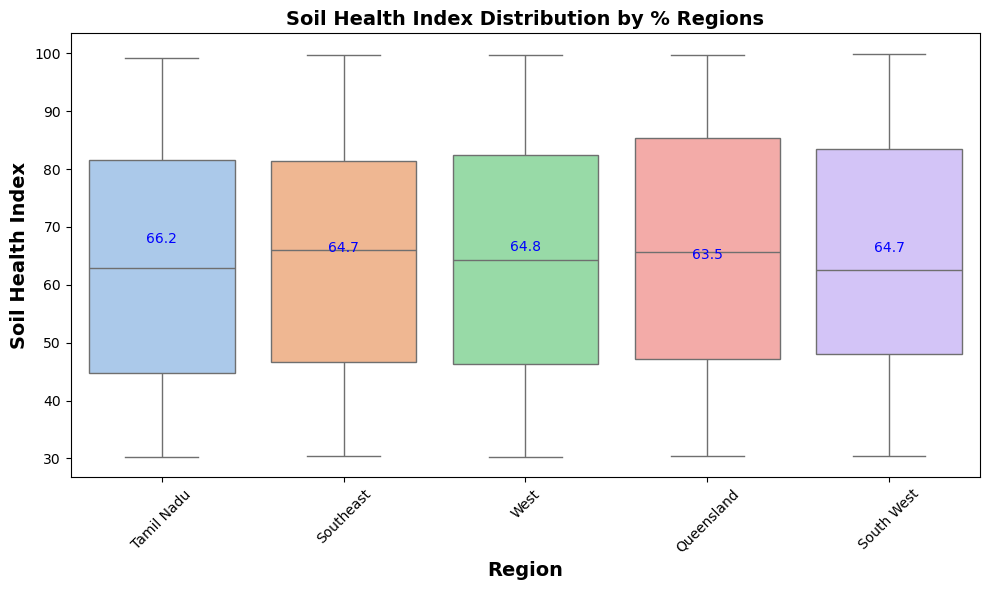

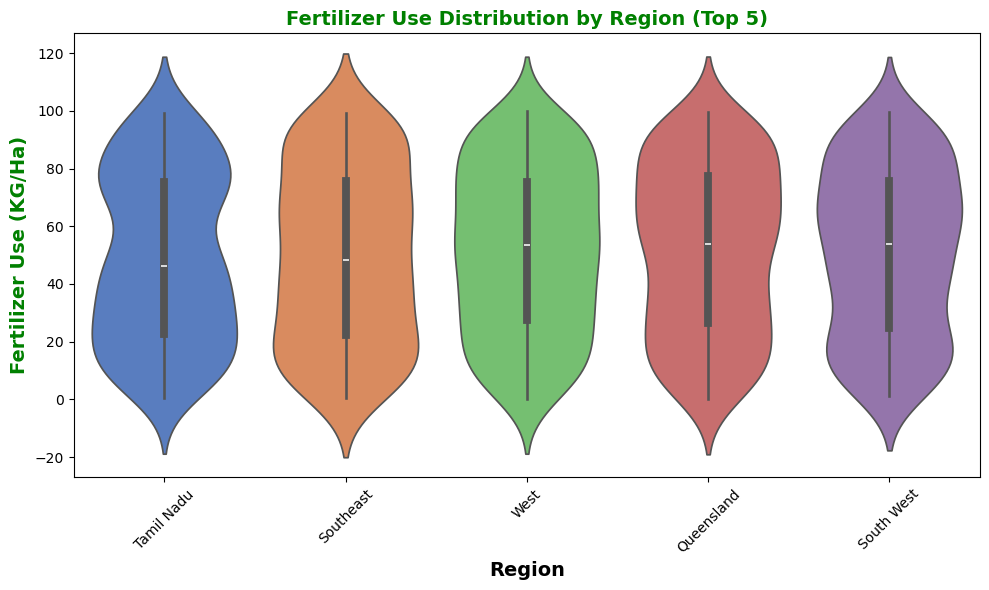

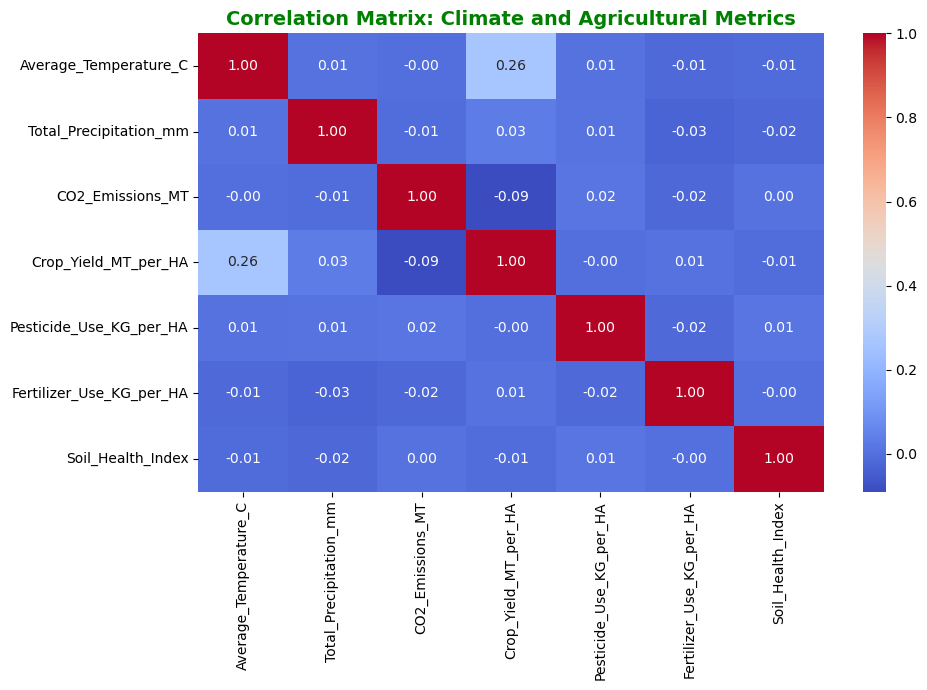

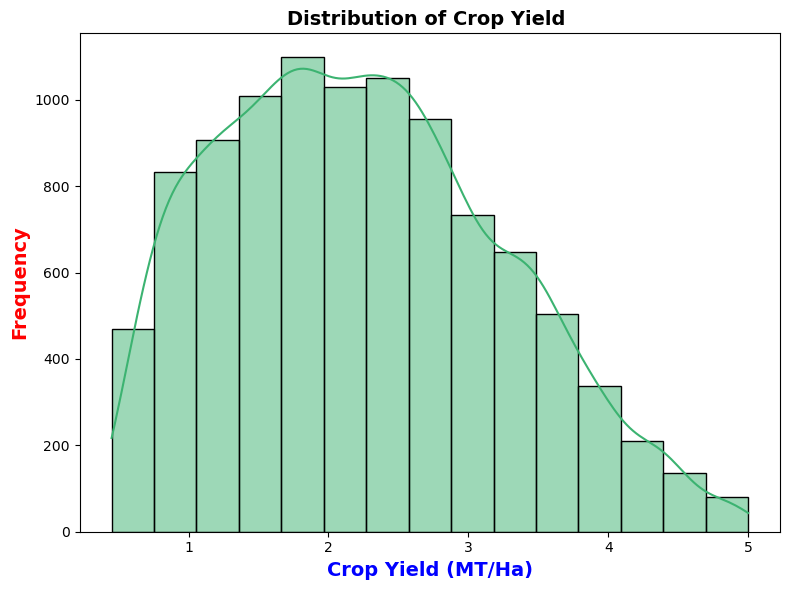

In [3]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warning messages
warnings.filterwarnings("ignore")

def load_clean_data(filepath: str) -> pd.DataFrame:
    """
    Load the dataset and remove rows with missing values.

    Args:
        filepath (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Cleaned DataFrame.
    """
    df = pd.read_csv(filepath)
    df = df.dropna()
    return df


def get_top_regions(df: pd.DataFrame, top_n: int = 5) -> pd.DataFrame:
    """
    Filter top 5 regions based on average crop yield.

    Args:
        df (pd.DataFrame): Cleaned dataset.
        top_n (int): Number of top regions to extract.

    Returns:
        pd.DataFrame: Data filtered to top N regions.
    """
    top_regions = df.groupby('Region')['Crop_Yield_MT_per_HA'] \
                    .mean().nlargest(top_n).index.tolist()
    return df[df['Region'].isin(top_regions)]


def plot_temperature_trend(df: pd.DataFrame):
    """Plot average temperature trend over years."""
    trend = df.groupby('Year')['Average_Temperature_C'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=trend, x='Year', y='Average_Temperature_C',
                 marker='o', color='firebrick')
    plt.title('Average Temperature Trend Over Years', fontsize=14, weight='bold')
    plt.xlabel('Year', fontsize=14, weight='bold')
    plt.ylabel('Avg Temperature (°C)', fontsize=14, weight='bold')
    plt.tight_layout()
    plt.savefig('lineplot_temperature_trend.png')
    plt.show()


def plot_soil_health_boxplot(df: pd.DataFrame):
    """Plot soil health index by region as a box plot with mean annotations."""
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(data=df, x='Region', y='Soil_Health_Index', palette='pastel')
    plt.title('Soil Health Index Distribution by % Regions', fontsize=14, weight='bold')
    plt.xlabel('Region', fontsize=14, weight='bold')
    plt.ylabel('Soil Health Index', fontsize=14, weight='bold')
    plt.xticks(rotation=45)

    region_means = df.groupby('Region')['Soil_Health_Index'].mean()
    for i, region in enumerate(region_means.index):
        mean_val = region_means[region]
        plt.text(i, mean_val + 1, f'{mean_val:.1f}', ha='center', color='blue', fontsize=10)

    plt.tight_layout()
    plt.savefig('boxplot_soil_health.png')
    plt.show()


def plot_fertilizer_violin(df: pd.DataFrame):
    """Plot distribution of fertilizer use across regions using violin plot."""
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x='Region', y='Fertilizer_Use_KG_per_HA', palette='muted')
    plt.title('Fertilizer Use Distribution by Region (Top 5)', fontsize=14, weight='bold',color='green')
    plt.xlabel('Region', fontsize=14, weight='bold')
    plt.ylabel('Fertilizer Use (KG/Ha)', fontsize=14, weight='bold',color='green')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('violinplot_fertilizer.png')
    plt.show()


def plot_correlation_heatmap(df: pd.DataFrame):
    """Plot heatmap showing correlation between climate and agriculture metrics."""
    corr_data = df[
        ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
         'Crop_Yield_MT_per_HA', 'Pesticide_Use_KG_per_HA',
         'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index']
    ]
    plt.figure(figsize=(10, 7))
    sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix: Climate and Agricultural Metrics', fontsize=14, weight='bold',color='green')
    plt.tight_layout()
    plt.savefig('corr_matrix_climate_agriculture.png')
    plt.show()


def plot_crop_yield_distribution(df: pd.DataFrame):
    """Plot histogram of crop yield distribution with KDE."""
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x='Crop_Yield_MT_per_HA', kde=True, bins=15, color='mediumseagreen')
    plt.title('Distribution of Crop Yield ', fontsize=14, weight='bold')
    plt.xlabel('Crop Yield (MT/Ha)', fontsize=14, weight='bold',color='blue')
    plt.ylabel('Frequency', fontsize=14, weight='bold',color='red')
    plt.tight_layout()
    plt.savefig('histogram_crop_yield.png')
    plt.show()


def generate_summary_table(df: pd.DataFrame) -> pd.DataFrame:
    """
    Generate a statistical summary table for numeric columns.

    Args:
        df (pd.DataFrame): Data to summarize.

    Returns:
        pd.DataFrame: Summary with mean, median, std, skew, kurtosis, and mode.
    """
    numeric_df = df.select_dtypes(include='number')
    summary = pd.DataFrame({
        'mean': numeric_df.mean(),
        'median': numeric_df.median(),
        'std': numeric_df.std(),
        'skew': numeric_df.skew(),
        'kurtosis': numeric_df.kurt(),
        'mode': numeric_df.mode().iloc[0]
    })
    return summary.round(2)


# === Script Execution ===
if __name__ == '__main__':
    # Load and prepare data
    data_path = 'climate_change_impact_on_agriculture_2024.csv'
    df_clean = load_clean_data(data_path)
    df_top5 = get_top_regions(df_clean, top_n=5)
    print(df_clean.head())
    print("---------------------------------------------------")
    print(df_clean.describe())
    print("-------------#########################--------------------------------------")
    # Display summary table
    summary_df = generate_summary_table(df_clean)
    print("=== Statistical Summary of  numeric columns ===\n")
    print(summary_df)

    # Generate all story-driven plots
    plot_temperature_trend(df_clean)
    plot_soil_health_boxplot(df_top5)
    plot_fertilizer_violin(df_top5)
    plot_correlation_heatmap(df_clean)
    plot_crop_yield_distribution(df_clean)